In [1]:
# Import libraries
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
file_path = '/content/parkinsons disease data.csv'  # Update with your file path if different
data = pd.read_csv(file_path)

# Drop non-relevant columns and separate features and target
features = data.drop(columns=["name", "status"])  # 'name' is non-numeric
target = data["status"]

# Compute Fisher Scores
fisher_scores, _ = f_classif(features, target)

# Create a DataFrame of feature scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Fisher Score': fisher_scores
}).sort_values(by='Fisher Score', ascending=False)

# Select the top 10 features
top_features = feature_scores['Feature'].head(10).values
X_selected = features[top_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size=0.3, random_state=42)

# Define classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate classifiers
results = []

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store the results
    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

# Display the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'F1 Score', 'Confusion Matrix'])
print(results_df)

            Classifier  Accuracy  F1 Score    Confusion Matrix
0  Logistic Regression  0.881356  0.924731   [[9, 6], [1, 43]]
1        Decision Tree  0.898305  0.933333  [[11, 4], [2, 42]]
2        Random Forest  0.932203  0.955556  [[12, 3], [1, 43]]
3          Naive Bayes  0.847458  0.891566  [[13, 2], [7, 37]]
4                  SVM  0.796610  0.877551  [[4, 11], [1, 43]]
5                  KNN  0.796610  0.866667   [[8, 7], [5, 39]]


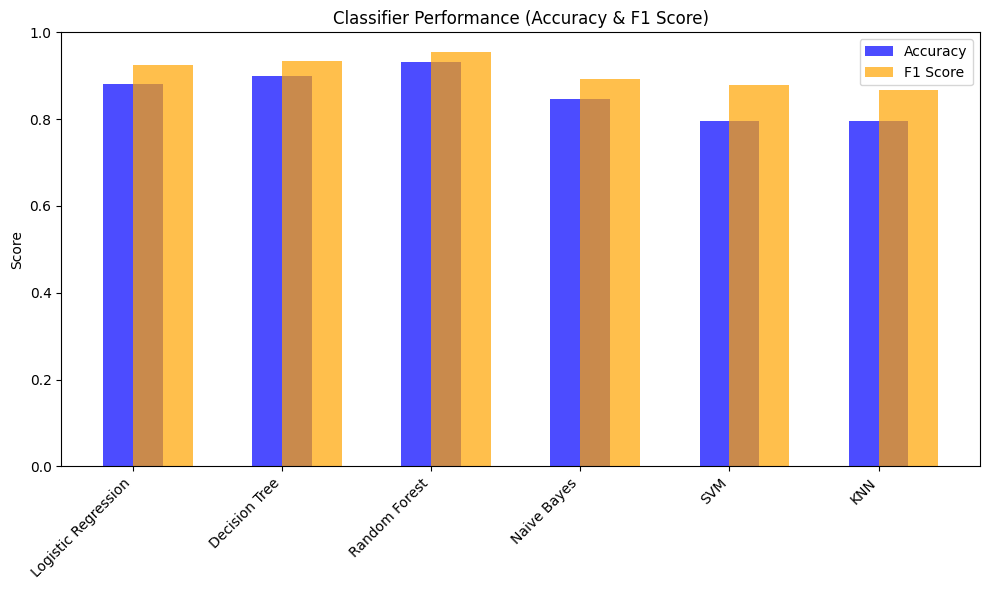

In [2]:
import matplotlib.pyplot as plt

# Extract classifier names, accuracies, and F1 scores for visualization
classifier_names = results_df['Classifier']
accuracies = results_df['Accuracy']
f1_scores = results_df['F1 Score']

# Plotting the results
x = range(len(classifier_names))

plt.figure(figsize=(10, 6))

# Accuracy bar
plt.bar(x, accuracies, width=0.4, label='Accuracy', alpha=0.7, color='blue', align='center')

# F1 Score bar
plt.bar(x, f1_scores, width=0.4, label='F1 Score', alpha=0.7, color='orange', align='edge')

# Adding labels and title
plt.xticks(x, classifier_names, rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Classifier Performance (Accuracy & F1 Score)')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()
